<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

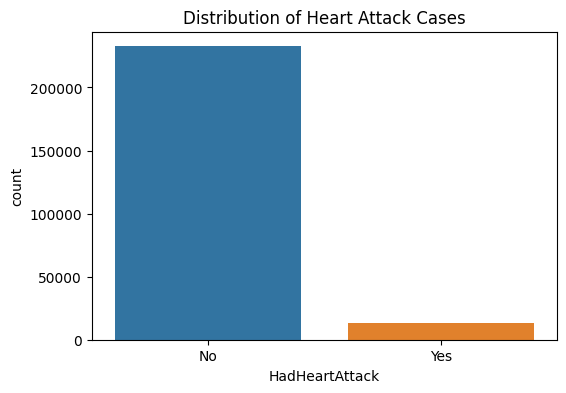

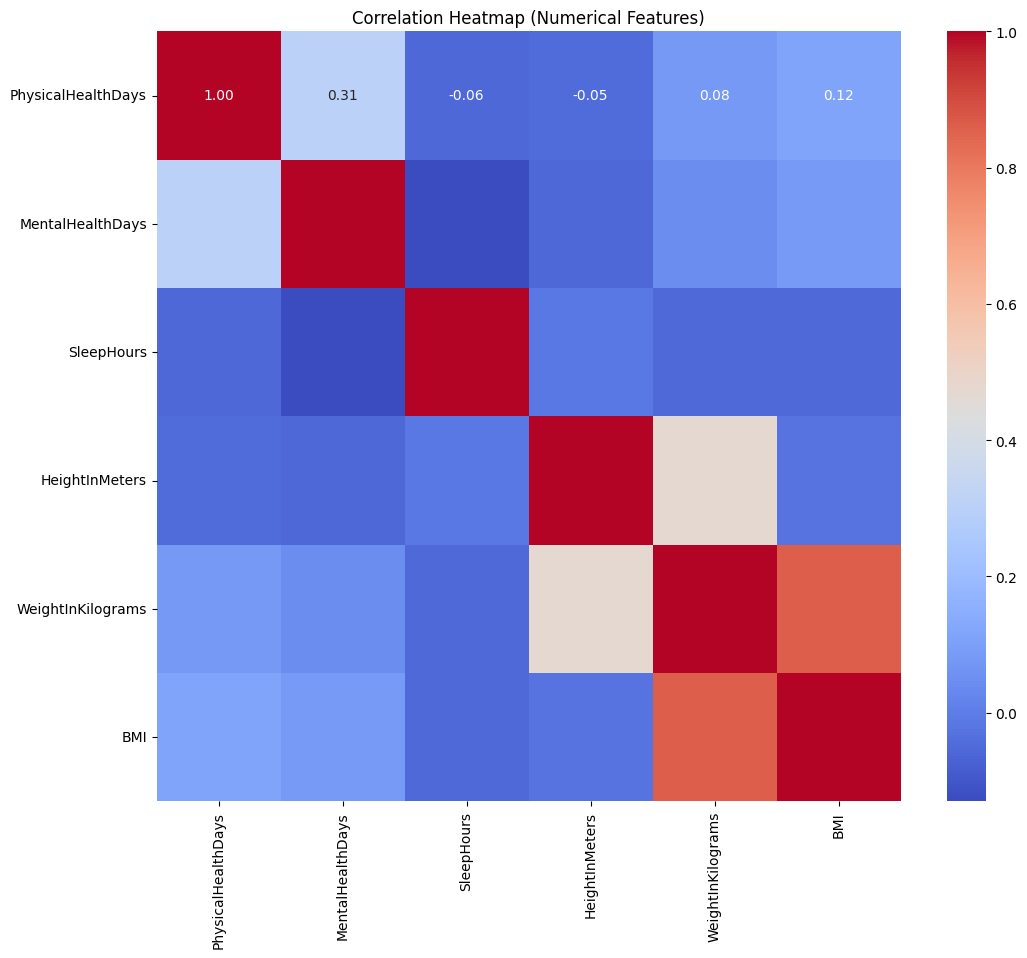

Number of features after PCA: 109
Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     46573
           1       0.54      0.24      0.34      2632

    accuracy                           0.95     49205
   macro avg       0.75      0.62      0.66     49205
weighted avg       0.94      0.95      0.94     49205

Accuracy: 0.95
Precision: 0.54
Recall: 0.24
F1 Score: 0.34


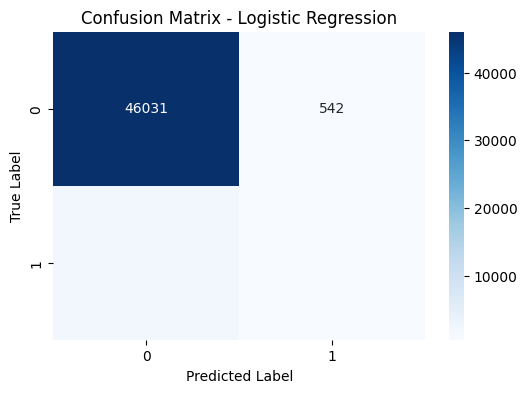

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler, LabelEncoder  
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1_l2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Load the dataset
data = pd.read_csv("/Users/moiz/Downloads/heart_2022_no_nans.csv")

# EDA
print(data.info())
print(data.describe())

# Check for null values
print(data.isnull().sum())

# Visualize the distribution of the target variable
plt.figure(figsize=(6,4))
sns.countplot(x='HadHeartAttack', data=data)
plt.title('Distribution of Heart Attack Cases')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

# Data preparation
X = data.drop('HadHeartAttack', axis=1)
y = data['HadHeartAttack']

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Encode categorical variables
X = pd.get_dummies(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Number of features after PCA: {X_train_pca.shape[1]}")
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_pca, y_train)
y_pred = logistic_regression.predict(X_test_pca)

print("Logistic Regression Results:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [1]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_pca, y_train)
y_pred = logistic_regression.predict(X_test_pca)

print("Logistic Regression Results:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

NameError: name 'X_train_pca' is not defined

Decision Tree Results:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     46573
           1       0.24      0.28      0.26      2632

    accuracy                           0.92     49205
   macro avg       0.60      0.61      0.61     49205
weighted avg       0.92      0.92      0.92     49205

Accuracy: 0.92
Precision: 0.24
Recall: 0.28
F1 Score: 0.26


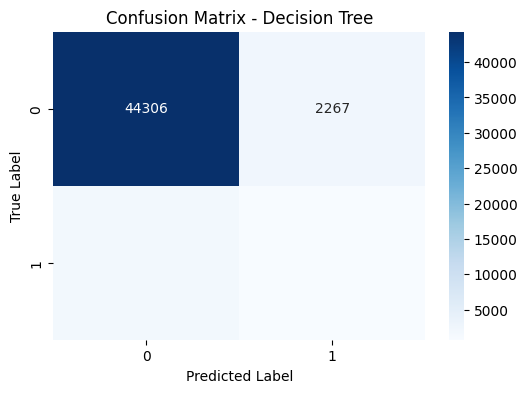

In [6]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_pca, y_train)
y_pred = decision_tree.predict(X_test_pca)

print("Decision Tree Results:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Random Forest Results:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     46573
           1       0.57      0.05      0.10      2632

    accuracy                           0.95     49205
   macro avg       0.76      0.53      0.54     49205
weighted avg       0.93      0.95      0.93     49205

Accuracy: 0.95
Precision: 0.57
Recall: 0.05
F1 Score: 0.10


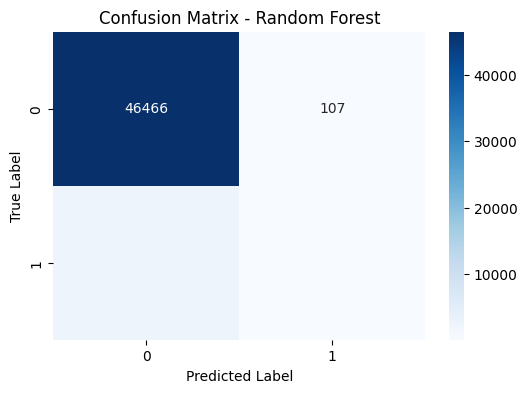

In [7]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(X_train_pca, y_train)
y_pred = random_forest.predict(X_test_pca)

print("Random Forest Results:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Number of features after PCA: 109
KNN Results:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     46573
           1       0.48      0.13      0.20      2632

    accuracy                           0.95     49205
   macro avg       0.71      0.56      0.59     49205
weighted avg       0.93      0.95      0.93     49205

Accuracy: 0.95
Precision: 0.48
Recall: 0.13
F1 Score: 0.20


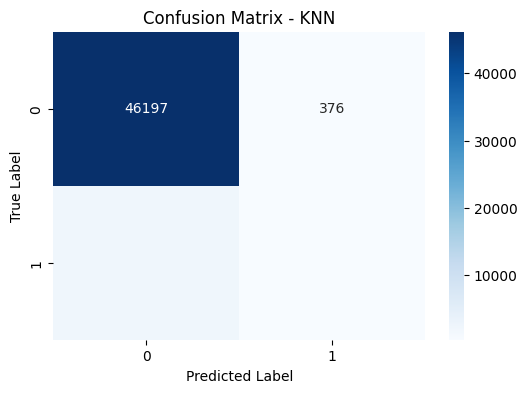

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Load the dataset
data = pd.read_csv("/Users/moiz/Downloads/heart_2022_no_nans.csv")

# Data preparation
X = data.drop('HadHeartAttack', axis=1)
y = data['HadHeartAttack']

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Encode categorical variables
X = pd.get_dummies(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Number of features after PCA: {X_train_pca.shape[1]}")

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_pca, y_train)
y_pred = knn.predict(X_test_pca)

print("KNN Results:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Number of features after PCA: 109
Naive Bayes Results:
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     46573
           1       0.25      0.63      0.36      2632

    accuracy                           0.88     49205
   macro avg       0.61      0.76      0.65     49205
weighted avg       0.94      0.88      0.90     49205

Accuracy: 0.88
Precision: 0.25
Recall: 0.63
F1 Score: 0.36


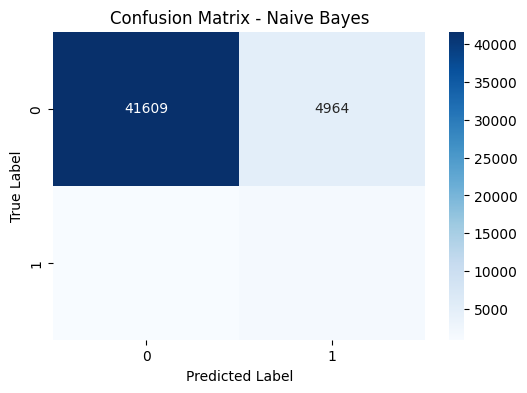

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Load the dataset
data = pd.read_csv("/Users/moiz/Downloads/heart_2022_no_nans.csv")

# Data preparation
X = data.drop('HadHeartAttack', axis=1)
y = data['HadHeartAttack']

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Encode categorical variables
X = pd.get_dummies(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Number of features after PCA: {X_train_pca.shape[1]}")
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(X_train_pca, y_train)
y_pred = naive_bayes.predict(X_test_pca)

print("Naive Bayes Results:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Neural Network (MLP) Results:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     46573
           1       0.25      0.29      0.27      2632

    accuracy                           0.92     49205
   macro avg       0.61      0.62      0.61     49205
weighted avg       0.92      0.92      0.92     49205

Accuracy: 0.92
Precision: 0.25
Recall: 0.29
F1 Score: 0.27


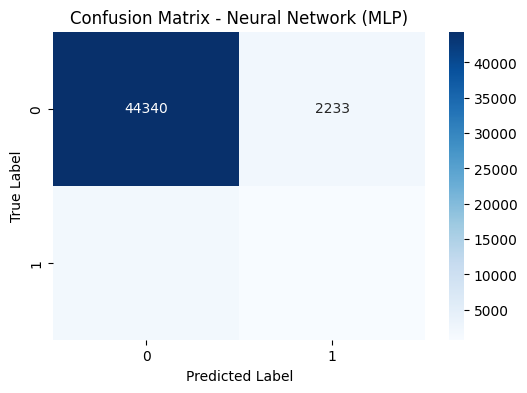

In [7]:
# Neural Network (MLP)
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)
mlp.fit(X_train_pca, y_train)
y_pred = mlp.predict(X_test_pca)

print("Neural Network (MLP) Results:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Neural Network (MLP)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# K-Means Clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(X_train_pca)

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('First PCA Component')
plt.ylabel('Second PCA Component')
plt.show()

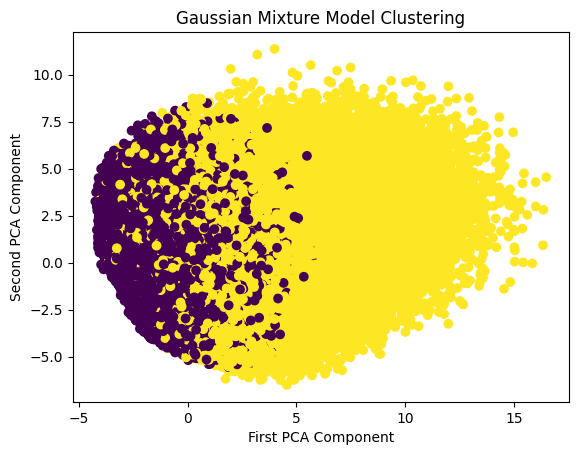

In [5]:
# Gaussian Mixture Model
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2)
gmm_clusters = gmm.fit_predict(X_train_pca)

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=gmm_clusters, cmap='viridis')
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('First PCA Component')
plt.ylabel('Second PCA Component')
plt.show()

1538/1538 [==============================] - 0s 264us/step

Neural Network (Keras) Results:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     46573
           1       0.54      0.21      0.31      2632

    accuracy                           0.95     49205
   macro avg       0.75      0.60      0.64     49205
weighted avg       0.93      0.95      0.94     49205

Accuracy: 0.95
Precision: 0.54
Recall: 0.21
F1 Score: 0.31


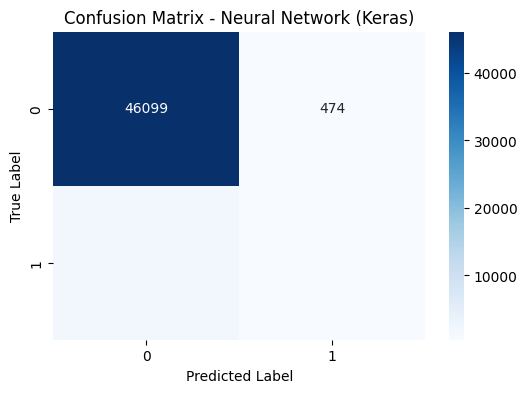

In [11]:
# Neural Network with Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_pca.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    X_train_pca, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_pca, y_test),
    verbose=0
)

# Evaluate the neural network
y_pred_prob = model.predict(X_test_pca)
y_pred_class = (y_pred_prob > 0.5).astype('int32')

print("\nNeural Network (Keras) Results:")
print(classification_report(y_test, y_pred_class))

accuracy = accuracy_score(y_test, y_pred_class)
precision = precision_score(y_test, y_pred_class)
recall = recall_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred_class)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Neural Network (Keras)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()